# 20.2 KNN Classifiers Challenge
## Challenge: Implement the Nearest Neighbor algorithm 

The Nearest Neighbor algorithm is extremely simple. So simple, in fact, that you should be able to build it yourself from scratch using the Python you already know. Code a Nearest Neighbors algorithm that works for two dimensional data. You can use either arrays or dataframes to do this. Test it against the SKLearn package on the music dataset from above to ensure that it's correct. The goal here is to confirm your understanding of the model and continue to practice your Python skills. We're just expecting a brute force method here. After doing this, look up "ball tree" methods to see a more performant algorithm design.

## Create Music Dataset
There are 3 variables in this dataset. Duration, Loudness, and Jazz. Note that 1 in jazz column represents that the song is considered Jazz. O's are considered Rock.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from sklearn.neighbors import KNeighborsClassifier

%matplotlib inline

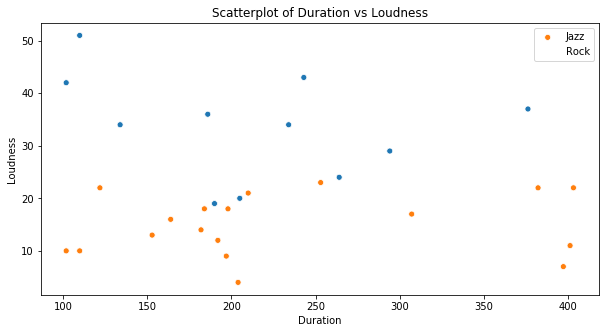

In [2]:
music = pd.DataFrame()

# Some data to play with.
music['duration'] = [184, 134, 243, 186, 122, 197, 294, 382, 102, 264, 
                     205, 110, 307, 110, 397, 153, 190, 192, 210, 403,
                     164, 198, 204, 253, 234, 190, 182, 401, 376, 102]
music['loudness'] = [18, 34, 43, 36, 22, 9, 29, 22, 10, 24, 
                     20, 10, 17, 51, 7, 13, 19, 12, 21, 22,
                     16, 18, 4, 23, 34, 19, 14, 11, 37, 42]

# We know whether the songs in our training data are jazz or not.
music['jazz'] = [ 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
                  0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
                  1, 1, 1, 1, 0, 0, 1, 1, 0, 0]

# Plot the data
plt.figure(figsize=(10,5))
sns.scatterplot(data=music, x='duration', y='loudness', hue='jazz')

plt.title('Scatterplot of Duration vs Loudness')
plt.xlabel('Duration')
plt.ylabel('Loudness')
plt.legend(['Jazz', 'Rock'])
plt.show()

## Define the Prediction Function
The prediction function will take the differences of each column of the dataframe with the input values. The differences will be summed together and the absolute value will be calculated for each variable. The smallests variables are considered to the closest points to the new point. Based on the number of neighbors selected, the probability will be calculated for rock or jazz. The highest probability will be returned. 

In [3]:
# Create algorthym to predict music type based on 
# duration, loudness, and nearest variables
def music_type(duration, loudness):
    x = []
    y = []
    

# Append the difference of each duration variable
    for dur in music['duration']:
        dur = duration - dur
        x.append(dur)

# Append the difference of each loudness variable
    for loud in music['loudness']:
        loud = loudness -loud
        y.append(loud)

# Append the absolute value sum of x and y lists
    z = [x, y]
    z = [sum(x) for x in zip(*z)]
    z = [abs(x) for x in z]
    
# Sort the dataframe from smallest to largest
    music['prediction'] = z
    music.sort_values(by=['prediction'], inplace=True)
    
# Select the smallest n amounts
    n_music = pd.DataFrame(music[:n])
    
# Calulate the probability of Jazz or Rock
    jazz = 0
    rock = 0
    
    for genre in n_music['jazz']:
        if genre == 0:
            rock += 1
        else:
            jazz += 1
    
    j_prob = jazz / n
    r_prob = rock / n
    
# Return prediction
    if j_prob > r_prob:
        return print('Music Genre Predicted: Jazz\n'+
                    'Jazz Probability: {}\n'.format(j_prob)+
                    'Rock Probability: {}\n'.format(r_prob))
    else:
        return print('Music Genre Predicted: Rock\n'+
                    'Jazz Probability: {}\n'.format(j_prob)+
                    'Rock Probability: {}\n'.format(r_prob))

## Function Results

In [10]:
# Input variables and run function
duration = 160
loudness = 45
n = 5
music_type(duration, loudness)

Music Genre Predicted: Jazz
Jazz Probability: 0.8
Rock Probability: 0.2



## K Nearest Neighbors
Now lets compare the function written above with the sklearn k nearest neighbors.

In [11]:
# input amount of neighbors in the KNN
neighbors = KNeighborsClassifier(n_neighbors=n)

# X is the variables in the model
X = music[['duration', 'loudness']]

# Y is the target variable
Y = music['jazz']

neighbors.fit(X,Y)

## Predict music type
print(neighbors.predict([[duration, loudness]]))
print(neighbors.predict_proba([[duration, loudness]]))

[1]
[[0.4 0.6]]


## Challenge Conclusions
Overall, the function that was created to predict the genre type performed relatively well in comparison to the K Nearest Neighbors. Both models predicted the same genre for the selected inputs: Jazz. What was interesting was that the KNN probability of the song being jazz was .6, while in the function created it was .8. This difference could be what is defined as a neighbor in the created function. 